In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('50_startups.csv')

In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

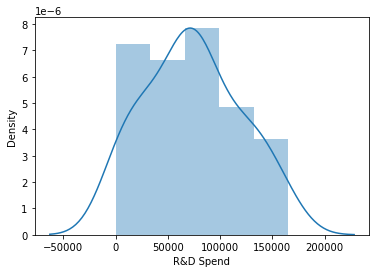

In [8]:
sns.distplot(df['R&D Spend'])

In [9]:
df.corr()   

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
y=df['Profit']
x1=df['R&D Spend']
x2=df['Administration']
x3=df['Marketing Spend']

import statsmodels.formula.api as smf
model=smf.ols("y~x1+x2+x3",data=df).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           4.53e-30
Time:                        22:56:41   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

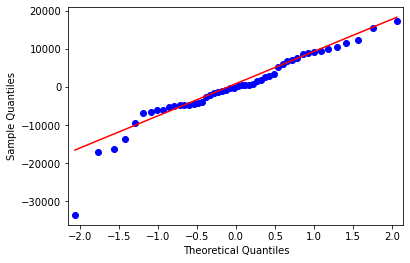

In [12]:
res=model.resid
import statsmodels.api as sm
plot=sm.qqplot(res,line='q')

<AxesSubplot:xlabel='Administration', ylabel='Profit'>

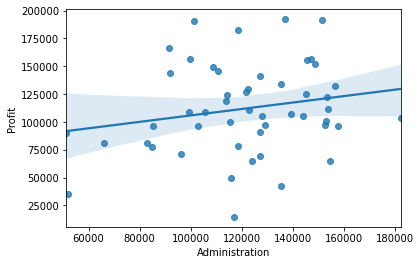

In [13]:
sns.regplot(x='Administration',y='Profit',data=df)

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

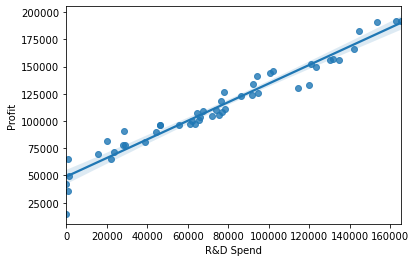

In [14]:
sns.regplot(x='R&D Spend',y='Profit',data=df)

In [15]:
newdata=pd.DataFrame({'x1':2000,'x2':1212,'x3':2312},index=[1])

In [16]:
newdata

,x1,x2,x3
1,2000,1212,2312


In [17]:
model.predict(newdata) #MUlTI LINEAR MODEL

1    51764.073422
dtype: float64

In [18]:
#creating a model without including 'Administration' feature

In [19]:
x11=df['R&D Spend']
x12=df['Marketing Spend']
y2=df['Profit']

In [20]:
model2=smf.ols("y~x11+x12",data=df).fit()

In [21]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           2.16e-31
Time:                        23:02:52   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x11            0.7966      0.041     19.266      0.000       0.713       0.880
x12            0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#conclusion:-R&D spend and Marketing Spend are contributing more than administration
#this time building a model with administration feature only to check whether this statement is correct or not

In [23]:
x22=df['Administration']
y=df['Profit']

In [24]:
model3=smf.ols("y~x22",data=df).fit()

In [25]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 02 Apr 2021   Prob (F-statistic):              0.162
Time:                        23:05:01   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
x22            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#since R squared of this particular model is very low
#we can say that the administration feature is less or not contributing in prediction of y i,e Profit

In [27]:
#this time we will only considering the marketing spend feature 

In [28]:
x3=df['Marketing Spend']
y3=df['Profit']

In [29]:
model4=smf.ols("y3~x3",data=df).fit()

In [31]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           4.38e-10
Time:                        23:07:10   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
x3             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#this time we will only consider R&D spend Feature

In [33]:
x4=df['R&D Spend']
y4=df['Profit']

In [34]:
model5=smf.ols("y4~x4",data=df).fit()

In [35]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y4   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           3.50e-32
Time:                        23:09:47   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x4             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

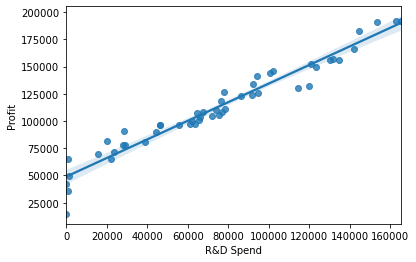

In [36]:
sns.regplot(x='R&D Spend',y='Profit',data=df)

In [37]:
#There is strong relation between R&D Spend and Profit Feature
#we can use R&D Spend to predict Profit

In [38]:
rsq1=model.rsquared
rsq2=model2.rsquared
rsq3=model3.rsquared
rsq4=model4.rsquared
rsq5=model5.rsquared


In [39]:
data=pd.DataFrame({'model1_r^2': rsq1, 'model2_r^2':rsq2, 'model3_r^2': rsq3, 'model4_r^2': rsq4},index=[1])

In [40]:
data

,model1_r^2,model2_r^2,model3_r^2,model4_r^2
1,0.950746,0.95045,0.040287,0.559154
